### Types of learning:

1. Supervised
   a. classification
   b. regression

2. Unsupervised
   a. clustering
   b. association
   c. dimensionality reduction

3. Reinforcement


Supervised learning: data has input and output columns
Unsupervised learning: data with input columns only (mostly)
Reinforcement learning: Reward and penalty  (Deepseek)


Supervised Output column:
1. Numerical: Regression (like prices)
2. Categorical: Classification (like loan approval, credit card fraud detection, heart disease)

Algorithm: predefined sequence of steps
ML algorithm --> dataset --> ML Model

### Linear Regression

### Simple Linear Regression 
#### 1 Input and 1 Output

When we have 2 numerical columns, always start with a scatterplot (like area, price).


In the Linear Regression algorithm, we need to pass a straight line through the data such that it is closest to all the data points.
This line is called as ML Model in the linear regression algorithm.

The problem is that there can be multiple lines (Regression lines) passing through the dataset and there can be multiple predictions.
Then we have to take the line that has learnt the pattern in the data in the best possible way.
this is called as Best fit Line and is closest to the all the datapoints. 

Follows trial and error method to find the best fit line.



##### So which line do we finally use?

the one which is closest to the data points which has learnt the relationship between input and output with least errors aka Best Fit Line.

Total distance = Total errors

prediction (y^)(y cap) - actual(y) = error in prediction made by the line (e)
Total errors(TE) = sum of all errors


we calculate TE for all the lines and compare
the line with the least TE, is the best fit line.

TE = e1 + e2 + e3 + e4 + e5
SSE (Sum of squared errors) = e1² + e2² + e3² + e4² + e5²
MSE (Mean squared error) = SSE / n
CF (Cost Function) = MSE/2 or SSE/2n


Gradient Descent is used to find Best Fit Line faster and optimized so we have divided MSE by 2.
CF is the finalized error we use. 



Finally, we need to represent the BFL mathematically.
### ŷ = mx + c
y = output (Price predicted)
x = Area (input which will be given)
c (intercept) = the y coordinate when we stretch the BFL to intersect the y axis
m = tan θ (after drawing a line crossing the intercept c but parallel to the x axis, forming an angle of θ with the BFL)


substitute the m and c in the formula.
That's the final ML model.

### Multiple Linear Regression

#### ŷ = m1x1 + m2x2 + m3x3 + m4x4 + c

For higher dimensions, such as 3 or more columns, instead of a single best-fit line, we'll have a best-fit plane (like a sheet of paper in the air).


In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [170]:
# class has capital letters
# in classes we need to make objects to use it
# in functions we have all small cases
# in functions we just call them

# sklearn is a package, metrics.py is a file / module in it


In [171]:
data = pd.read_csv(r"C:\Users\Pooja\Downloads\Boston.csv")

In [172]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [173]:
# till istat these are called as input, features, independent variables
# medv is called as output, target , dependent variable.

In [174]:
data.shape

(506, 14)

In [175]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [176]:
data.duplicated().sum()

0

In [177]:
data[data.duplicated()]
# prints all the duplicate rows from the dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


In [178]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [179]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


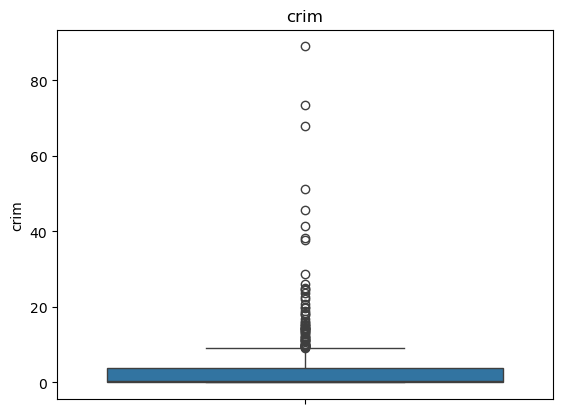

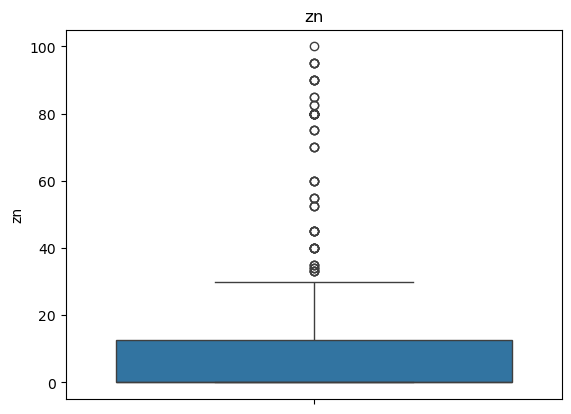

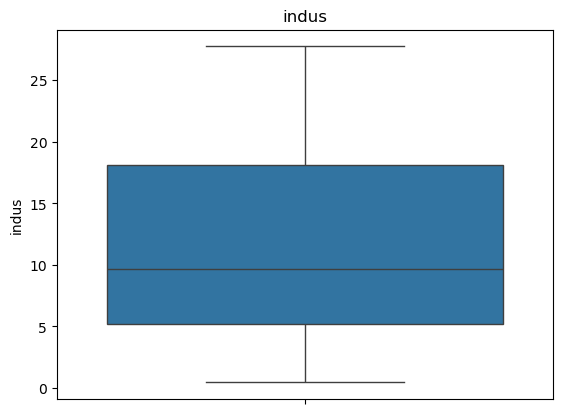

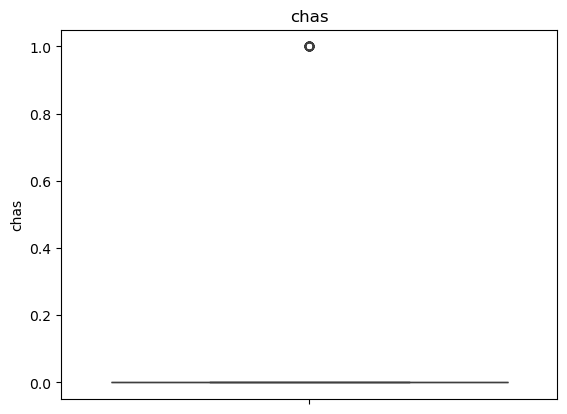

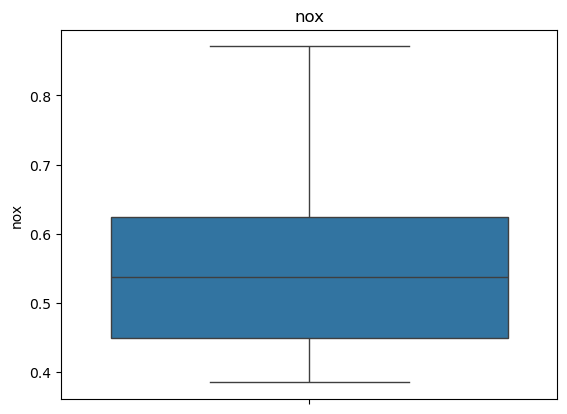

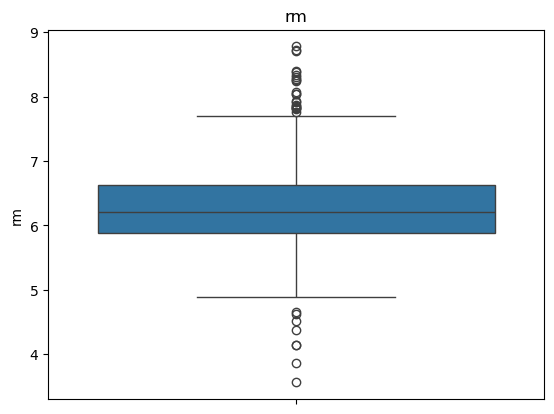

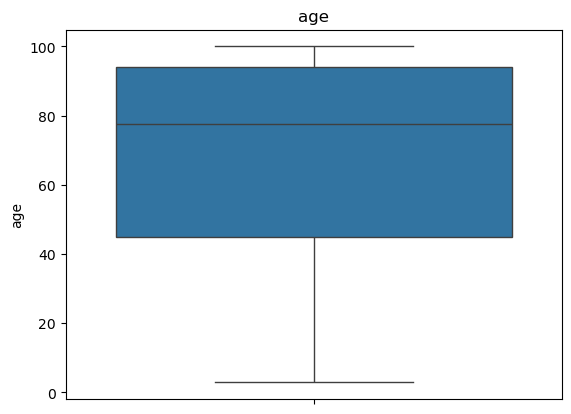

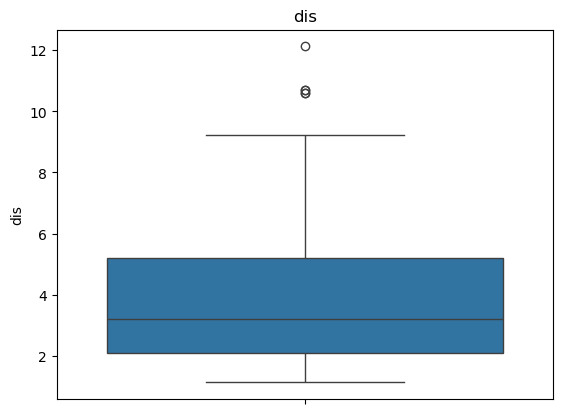

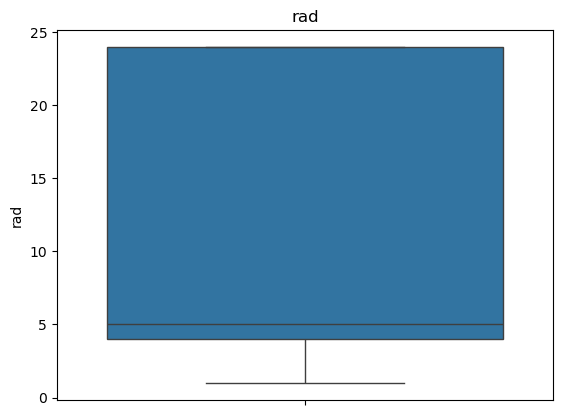

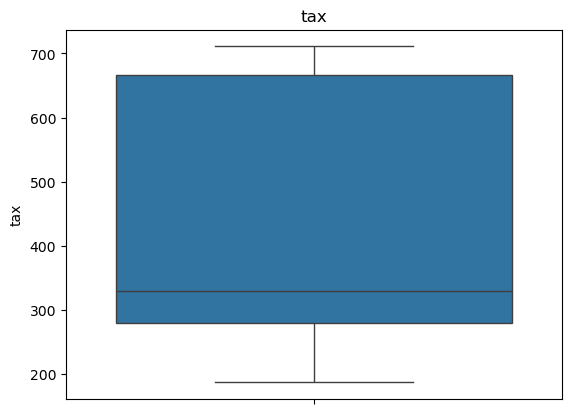

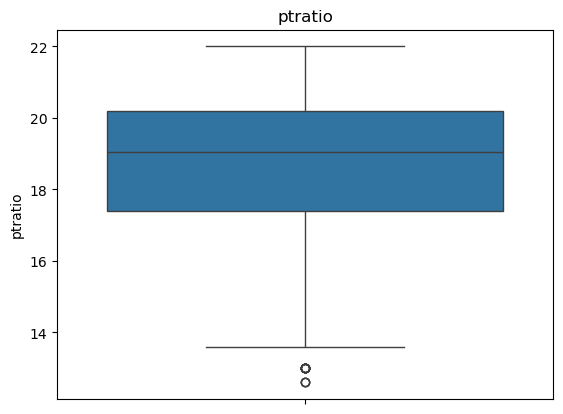

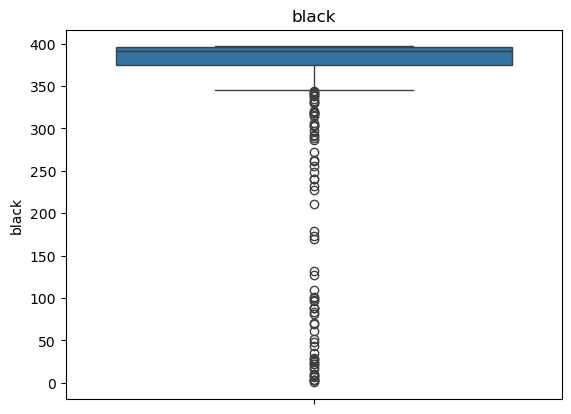

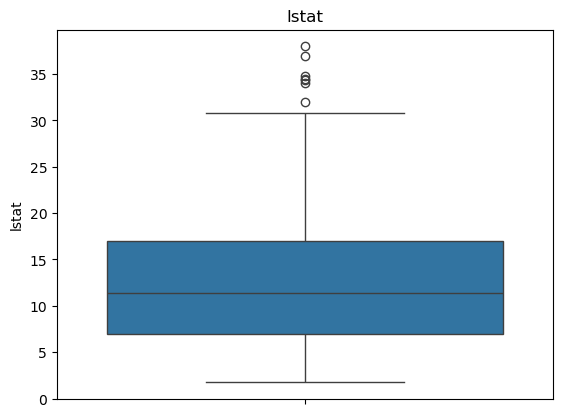

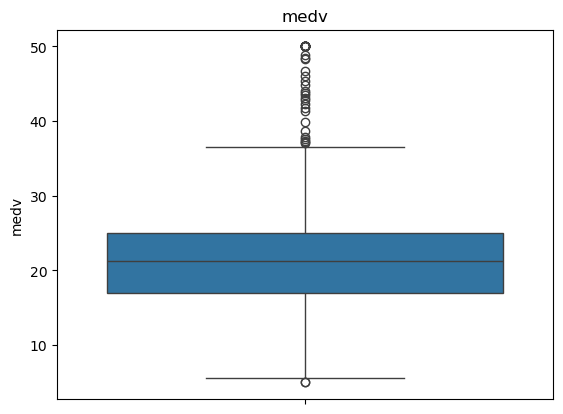

In [180]:
for i in data.columns:
    if data[i].dtype != 'object':
      sns.boxplot(data[i])
      plt.title(i)
      plt.show()

### Machine learning steps

1. Create X and y variables to store inputs and outputs
2. Split the data into a training and testing set
3. Standardization / Scaling of the data
4. Apply the suitable ML algorithm on the training data to learn the patterns.
5. Test the performance / accuracy of the model using the testing data before we use our model in real world.

In [182]:
# X is always capital and stores inputs
# y is alwayssmall and stores outputs

In [183]:
X = data.drop(columns = 'medv')
y = data['medv']

In [184]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Apply Linear Regression on the data

In [186]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [187]:
lin_reg.intercept_

37.20154305101827

In [188]:
lin_reg.coef_

array([-1.12341045e-01,  4.80683232e-02,  4.88687909e-02,  1.60982560e+00,
       -1.93458146e+01,  4.02307005e+00,  3.37239876e-03, -1.44501923e+00,
        3.58904085e-01, -1.51812079e-02, -1.02273010e+00,  8.61627473e-03,
       -5.02555628e-01])

In [189]:
y_pred = lin_reg.predict(X_test)

In [190]:
y_pred

array([27.29900522, 22.23189895, 24.76005878,  2.85128662, 15.60118935,
       39.5180276 , 13.52100271, 20.44282725, 19.59017415, 21.49372756,
       37.46022727, 24.33008875, 24.70572576, 19.94632411, 18.29713639,
       17.93524777, 17.34428267, 20.72178356, 24.88858971, 17.89274129,
       21.73130745, 21.07933401, 21.73484653, 24.49501822, 13.34560007,
       24.27868363, 22.67656106, 31.37930508, 28.64319095, 17.80054073,
       19.87209897, 15.25262707, 22.84187478, 19.32305453, 37.88162787,
       11.80347819, 23.88074375, 14.67248623, 10.10354333, 35.81082877,
       24.6368048 , 36.37670306, 24.11444237, 18.42420225, 19.21741465,
       30.98902682, 23.6641495 , 27.93821605, 20.25038039, 24.08809535,
       30.45957953, 34.68226419, 19.96803505, 18.79176231, 11.29184582,
       15.05416889, 17.82985104,  6.38396594, 17.07357299, 24.52814914,
       19.60933618, 13.49499225, 19.97366883, 16.75850249, 20.44035251,
        6.84739345, 15.90108393, 12.28051804, 28.49612014, 17.12

In [191]:
y_test

94     20.6
108    19.8
164    22.7
490     8.1
18     20.2
       ... 
77     20.8
369    50.0
269    20.7
125    21.4
177    24.6
Name: medv, Length: 102, dtype: float64

In [192]:
r2_score(y_test, y_pred)

0.7065196147885726

### Performance Metrics in Regression Models

1. r2 score
2. adjusted r2 score
3. mean squared error
4. root mean squared error

In [194]:
mse = mean_squared_error(y_test, y_pred)

In [195]:
mse

23.933151650134448

In [196]:
rmse = np.sqrt(mse)

In [197]:
rmse

4.892152046914982

In [198]:
# so the predicted value can differ from the actual value by an average of emse i.e. 5.48 

### The reason behind the low score

#### A. Assumptions

1. linear regressions assume that there's a linear relationship between input and output columns.
2. when the TE is zero or close to zero, the data is suitable for linear regression.
3. The data should follow homoscedasticity. The data should be equally spread around the BFL.
4. Multicollinearity should not be present in the data. The input columns should not be highly correlated with each other.
   VIF (Variance Inflation Factor) helps in identifying and removing multicollinearity. VIF score of more than 5 means high collinearity.


#### B. very less Data

#### C. Outliers present

### Remedies
So, we can:
1. gather more data
2. remove outliers
3. use another more powerful algorithm